---
## Комментарий от наставника

Привет, Татьяна! Спасибо, что прислала задание:) Поздравляю с приближением к концу первого модуля. Мои комментарии, как обычно, обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии.

---

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  
  Данные за 2016 год могут быть неполными.

## План

 - Предобработка данных
 - Исследовательский анализ данных
    - Анализ игр по годам
    - Анализ по платформам
    - Анализ жанров
 - Портрет пользователя каждого региона
 - Гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports

---
## Комментарий от наставника

Хорошее вступление в работу.

---

In [211]:
import pandas as pd
data_games =  pd.read_csv('/datasets/games.csv')

In [212]:
data_games.info()
data_games.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Пропущенные значения в years of release (мало).
Critic_Score	User_Score	Rating (и кстати пропуски идут во всех трех столбцах сразу, но судя по info не всегда)

---
## Комментарий от наставника

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

---

# Шаг 2. Подготовьте данные

 - Замените названия столбцов (приведите к нижнему регистру);

In [213]:
data_games.columns = data_games.columns.str.lower()
print(data_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

 - Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, 
как его обработать;

In [214]:
data_games['year_of_release'].isna().sum()

269

In [215]:
data_games.dropna(subset = ['year_of_release'], inplace=True)

In [216]:
#вычищаем другие незначачительные пропуски
data_games.dropna(subset = ['name'], inplace=True)

In [217]:
data_games['year_of_release']= data_games['year_of_release'].astype('int')

Основная проблема в рейтингах. Но, если залезть в википедию, их начали ставить только играм с 1996 года. Вряд ли нас будут интересовать такие древние даты. Сделаем срез нчиная с 2000. (более ранние, нам будут вряд ли интересны)

In [218]:
data_games.pivot_table(index='genre', columns='rating',  values='year_of_release', aggfunc='count')

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,410.0,468.0,1.0,NaN,596.0,NaN,670.0
Adventure,NaN,159.0,67.0,2.0,NaN,98.0,NaN,114.0
Fighting,NaN,8.0,19.0,NaN,NaN,48.0,NaN,357.0
Misc,NaN,449.0,166.0,5.0,1.0,13.0,NaN,228.0
Platform,NaN,354.0,141.0,NaN,NaN,3.0,NaN,63.0
Puzzle,NaN,284.0,42.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,576.0,95.0,NaN,NaN,18.0,NaN,167.0
Role-Playing,NaN,83.0,111.0,NaN,NaN,161.0,NaN,415.0
Shooter,NaN,47.0,56.0,NaN,NaN,553.0,NaN,340.0


Нет столбца на основании которого мы могли бы заполнить rating.

In [219]:
print(data_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


#user_score
user_score находится в стоиянии object, потому что там есть tbd, что означает to be determined, т. е по сутине определено, т. е. nan

---
## Комментарий от наставника

Верно, по своей сути tbd и является Nan. 

---

In [220]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [221]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [222]:
data_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Critic_score и user_score пока не будем заполнять. Во-первых до 1996 года этих оценок в принципе не существовало, а данные за этот период нам скорее всего не понадобятся. Во вторых там достаточно большое количество пропусков и их заполнение изменит среднее, дисперсию и т. п и тем самым исказить взаиомсвязи. В дальнейшем будет стоять задача посмотреть влияние оценок пользователей на продажи. Будет странно смотреть влияние оценок, которых не было, на продажи.

---
## Комментарий от наставника

Да, лучше работать с меньшим количеством данных хорошего качества. Можно использовать индикаторные значения для заполнения пропущенных значений. Так мы просто пометим места пропусков. Главное помнить об этом и не использовать их в анализе.

---

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [223]:
data_games['world_sales']=data_games['na_sales']+ data_games['eu_sales'] + data_games['jp_sales']+data_games['other_sales']
print(data_games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

---
## Комментарий от наставника

Таблицы на печать выводи с помощью метода display. 

---

In [224]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


---
## Комментарий от наставника

Ошибки в данных устранены. Пропуски обработаны там, где возможно. Данные подготовлены к дальнейшему анализу. 

---

 # Шаг 3. Проведите исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [225]:
import seaborn as sns
import matplotlib as plt


game_years = data_games.pivot_table(index='year_of_release', values='name', aggfunc='count')

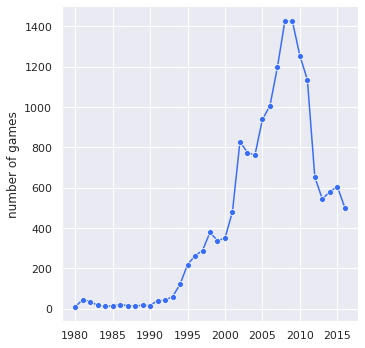

In [226]:
sns.set(style="darkgrid", palette='rainbow')
sns.relplot(kind="line", markers=True, data=game_years, legend=False, style='dark').set(ylabel='number of games');

С 1980 по 1990 выпускалось очень мало игр. Пик приходит 2008 - 2009. Но для сапоставления с текущим периодом можно взять период с начала 2000.

 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [227]:
platform_sales = data_games.pivot_table(index='platform', values='world_sales', aggfunc='sum')
print(platform_sales.sort_values(by='world_sales', ascending=False))

          world_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


In [228]:
#отсекаем маленькие платформы
platform_list = platform_sales.query('world_sales>250').index
platform_top = platform_sales.query('world_sales>300').index

data_games.query('platform in @platform_list').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')

platform,3DS,DS,GB,GBA,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,
1983,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.02,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.43,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,64.97,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,4.89,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,5.57,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


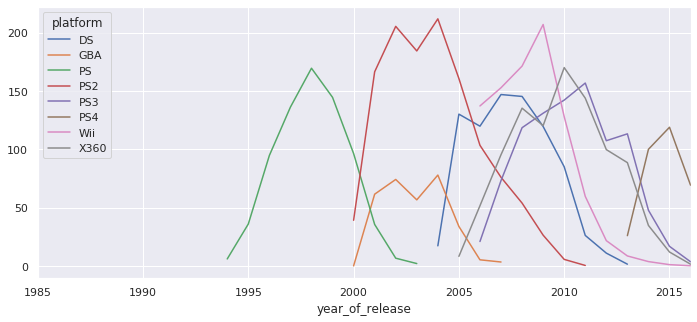

In [229]:
top_data = data_games.query('platform in @platform_top').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
sns.set(rc={'figure.figsize':(11.7,5)})
top_data.plot()

Из графика видно что платформа существует около 10 лет

 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Берем последние 5 лет. Потому что за этот период будет видно падает или растет платформа.

---
## Комментарий от наставника

Верное значение по средней продолжительности существования платформы, можно подкрепить расчетами.

---

## Платформы
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

---
## Комментарий от наставника

Выбран правильный актуальный год. Так в рассмотрение попадут только последние поколения платформ. 

---

In [230]:
data_actual = data_games.query('year_of_release>2011')
data_actual.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum').sort_values(by=2015, ascending=False)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,NaN,25.99,100.00,118.90,69.25
XOne,NaN,18.96,54.07,60.14,26.15
3DS,51.36,56.57,43.76,27.78,15.14
PS3,107.36,113.25,47.76,16.82,3.60
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52
PC,23.22,12.38,13.28,8.52,5.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18


In [231]:
data_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: world_sales, dtype: float64

Поскольку за 2016 год данные неполные, то нужно смотреть на 2015 год. Растут платформа PS4, XOne. PS3, X360, 3DS падают.

---
## Комментарий от наставника

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

---

 - Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: world_sales, dtype: float64

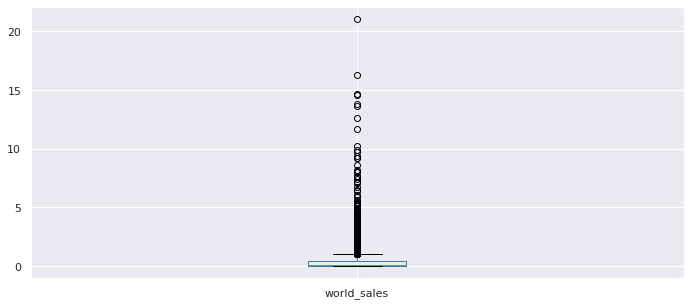

In [232]:
data_actual.boxplot('world_sales')
data_actual['world_sales'].describe()

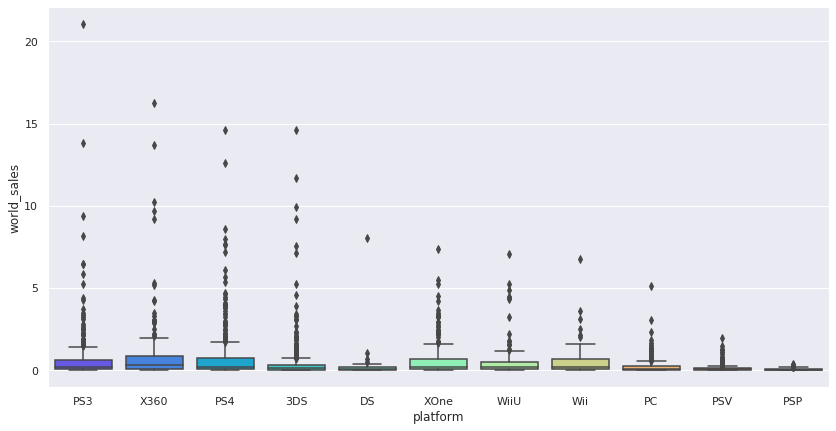

In [233]:
sns.set(rc={'figure.figsize':(14,7)})
sns.boxplot(x="platform", y="world_sales", palette='rainbow', data=data_actual)

На графике видно много игр, продажа которых значительно больше средних продаж игр. Они являются своего рода хитами. Если смотреть на разрос продаж по платформам, то средние продажи игр по разным платформам не так сильно различаются, но у разных платформ разно количество хитовых игр, которые делают им продажи.

 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [234]:
import numpy as np

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--PS4--
Корреляция продаж и оценок критиков  0.41
Корреляция продаж и оценок пользователей -0.03


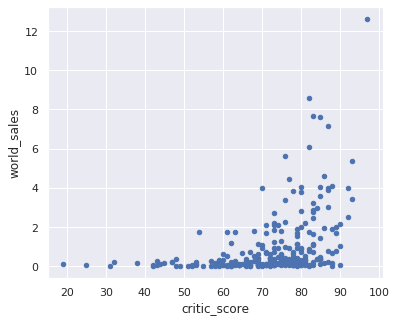

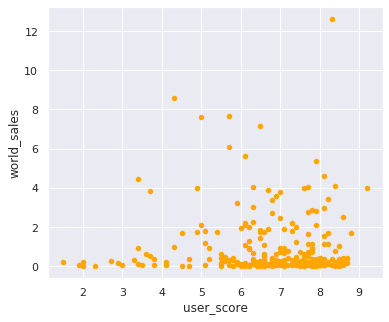

In [235]:
sns.set(rc={'figure.figsize':(6,5)})
data_actual.query('platform == "PS4"').plot(x='critic_score', y='world_sales', kind='scatter')
data_actual.query('platform == "PS4"').plot(x='user_score', y='world_sales', kind='scatter', color='orange')

print('--PS4--')
data_PS4 = data_actual.query('platform == "PS4"')

print('Корреляция продаж и оценок критиков {: 0.2f}'.format(data_PS4['world_sales'].corr(data_PS4['critic_score'])))
print('Корреляция продаж и оценок пользователей {: 0.2f}'.format( data_PS4['world_sales'].corr(data_PS4['user_score']) ) )


Корреляция между оценками критиков и пользователей довольрно низкая: по графикам видно, что оценка может больше 80 у критиков и 8 у пользователей, но продажи у игр низкие. Однако корреляция оценок критиков все-таки больше (0.4), чем пользователей (0)

---
## Комментарий от наставника

Результат верный. Подумай, чем он вызван. 

---

 - Соотнесите выводы с продажами игр на других платформах.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--PS3--
Корреляция продаж и оценок критиков  0.33
Корреляция продаж и оценок пользователей -0.01


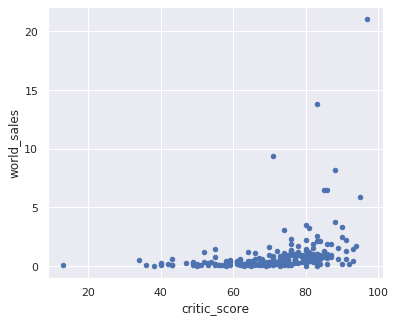

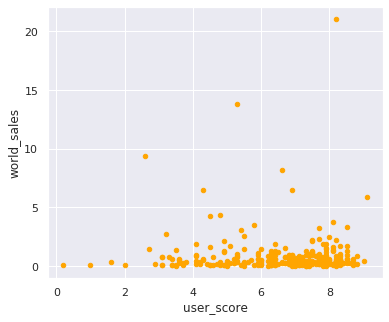

In [236]:
data_PS3 = data_actual.query('platform == "PS3"')

sns.set(rc={'figure.figsize':(6,5)})
data_PS3.plot(x='critic_score', y='world_sales', kind='scatter')
data_PS3.plot(x='user_score', y='world_sales', kind='scatter', color='orange')

print('--PS3--')
print('Корреляция продаж и оценок критиков {: 0.2f}'.format(data_PS3['world_sales'].corr(data_PS3['critic_score'])))
print('Корреляция продаж и оценок пользователей {: 0.2f}'.format( data_PS3['world_sales'].corr(data_PS3['user_score']) ) )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--PS3--
Корреляция продаж и оценок критиков  0.36
Корреляция продаж и оценок пользователей  0.01


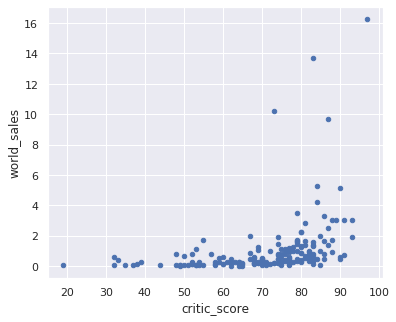

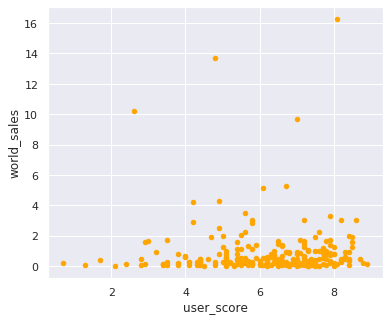

In [237]:
data_X360 = data_actual.query('platform == "X360"')

sns.set(rc={'figure.figsize':(6,5)})
data_X360.plot(x='critic_score', y='world_sales', kind='scatter')
data_X360.plot(x='user_score', y='world_sales', kind='scatter', color='orange')

print('--PS3--')
print('Корреляция продаж и оценок критиков {: 0.2f}'.format(data_X360['world_sales'].corr(data_X360['critic_score'])))
print('Корреляция продаж и оценок пользователей {: 0.2f}'.format( data_X360['world_sales'].corr(data_X360['user_score']) ) )

Картина по другим платформам не отличается.

---
## Комментарий от наставника

Здорово, что рассмотрены несколько платформ. Однако процесс стоит автоматизировать. 

---

 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [238]:
data_genre = data_actual.pivot_table(index='genre', values='world_sales', aggfunc=['sum', 'mean', 'count'])
data_genre.columns = ['world_sales', 'mean', 'number']
data_genre.sort_values(by='world_sales', ascending=False)

,world_sales,mean,number
genre,,,
Action,441.12,0.427856,1031
Shooter,304.73,1.296723,235
Role-Playing,192.80,0.521081,370
Sports,181.07,0.675634,268
Misc,85.04,0.442917,192
Platform,61.00,0.717647,85
Racing,53.50,0.465217,115
Fighting,44.49,0.408165,109
Simulation,35.12,0.439000,80


Самый доходный жанр action (и он же лидер по количеству игр), на втором месте shooter(хотя в среднем shooter зарабатывает больше, чем action), третьем sport. Самые неприбыльные жанры стратегии и пазлы. Возможно пазлы перешли в mobile.

---
## Комментарий от наставника

Правильно, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

---

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [239]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

data_na_sales = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by ='na_sales', ascending=False)
na_sales_total = data_actual['na_sales'].sum()

def na_sales_share(data_actual):
    na_sales = data_actual['na_sales']
    na_share = data_actual/na_sales_total
    return na_share

data_na_sales['share']= data_na_sales.apply(na_sales_share, axis=1)
print(data_na_sales)

          na_sales     share
platform                    
X360        140.05  0.236983
PS4         108.74  0.184003
PS3         103.38  0.174933
XOne         93.12  0.157571
3DS          55.31  0.093592
WiiU         38.10  0.064470
PC           19.12  0.032354
Wii          17.45  0.029528
PSV          10.98  0.018580
DS            4.59  0.007767
PSP           0.13  0.000220


In [240]:
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

data_eu_sales = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by ='eu_sales', ascending=False)
eu_sales_total = data_actual['eu_sales'].sum()

def eu_sales_share(data_actual):
    eu_sales = data_actual['eu_sales']
    eu_share = data_actual/eu_sales_total
    return eu_share

data_eu_sales['share']= data_eu_sales.apply(eu_sales_share, axis=1)
print(data_eu_sales)

          eu_sales     share
platform                    
PS4         141.09  0.278383
PS3         106.86  0.210844
X360         74.52  0.147034
XOne         51.59  0.101792
3DS          42.64  0.084132
PC           37.76  0.074504
WiiU         25.13  0.049584
Wii          11.92  0.023519
PSV          11.36  0.022414
DS            3.53  0.006965
PSP           0.42  0.000829


In [241]:
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

data_jp_sales = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_sales_total = data_actual['jp_sales'].sum()

def jp_sales_share(data_actual):
    jp_sales = data_actual['jp_sales']
    jp_share = data_actual/jp_sales_total
    return jp_share

data_jp_sales['share']= data_jp_sales.apply(jp_sales_share, axis=1)
print(data_jp_sales)

          jp_sales     share
platform                    
3DS          87.79  0.455862
PS3          35.29  0.183249
PSV          21.04  0.109253
PS4          15.96  0.082875
WiiU         13.01  0.067556
PSP          10.47  0.054367
DS            3.72  0.019317
Wii           3.39  0.017603
X360          1.57  0.008152
XOne          0.34  0.001766
PC            0.00  0.000000


Самые популярные платфоры в США: 
X360 -24%, 
PS4 - 18%,
PS3 - 17%,
XOne - 16%,
3DS - 9%,

Европа:
PS4 - 28%,
PS3  - 21%, 
X360 - 15%, 
XOne - 10%, 
3DS - 8%,

Япония:
3DS - 46%
PS3 - 18%
PSV  - 11%
PS4 - 8%
WiiU  -7%

Европа и Северная Америка в целом похожи по топ 5 платформам, однако в Северной Америке лидирует X360 (24% рынка), а в Европе лидирует PS4 (28% ). Но Япония сильно отличается от западного мира. 46% занимает платформа 3DS.


 - Самые популярные жанры (топ-5). Поясните разницу.

In [242]:
print('NA', data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False))
print('EU', data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))
print('JP', data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))

NA genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64
EU genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64
JP genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64


NA genre
 - Action          177.84
 - Shooter         144.77
 - Sports           81.53
 - Role-Playing     64.00
 - Misc             38.19

EU genre
 - Action          159.34
 - Shooter         113.47
 - Sports           69.09
 -  Role-Playing     48.53
 - Racing           27.29

JP genre
- Action          159.34
- Shooter         113.47
- Sports           69.09
- Role-Playing     48.53
- Racing           27.29

Вывод: Первые четрые жанра везде одинаковые: Action, Shooter, Sports, Role-playing

 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [243]:
data_actual['rating'] = data_actual['rating'].fillna('no_rating')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
rating_sales = data_actual.pivot_table(index='rating', aggfunc='sum')
rating_sales.drop(['critic_score', 'user_score', 'year_of_release'], axis=1)


,eu_sales,jp_sales,na_sales,other_sales,world_sales
rating,,,,,
E,113.03,28.33,114.37,31.44,287.17
E10+,55.37,8.19,75.70,16.23,155.49
M,193.96,21.20,231.57,63.38,510.11
T,52.96,26.02,66.02,17.94,162.94
no_rating,91.50,108.84,103.31,27.17,330.82


In [245]:
print('Продажи в Европе {: 0.2f}'.format( data_actual['eu_sales'].sum()))
print('Продажи в Японии {: 0.2f}'.format( data_actual['jp_sales'].sum()))
print('Продажи в Северной Америке {: 0.2f}'.format( data_actual['na_sales'].sum()))

Продажи в Европе  506.82
Продажи в Японии  192.58
Продажи в Северной Америке  590.97


In [246]:
sales_platform_percent = rating_sales.iloc[:, [1, 2, 3, 4, 6]].apply(lambda x: round(x / x.sum() * 100, 1))
print(df_percent)

           eu_sales  jp_sales  na_sales  other_sales  world_sales
rating                                                           
E              22.3      14.7      19.4         20.1         19.9
E10+           10.9       4.3      12.8         10.4         10.7
M              38.3      11.0      39.2         40.6         35.3
T              10.4      13.5      11.2         11.5         11.3
no_rating      18.1      56.5      17.5         17.4         22.9


В Япониии большую долю рынка занимают игры без рейтинга (более 50%). США и Европа очень похожи. По миру лидируют игры с рейтингом mature/ (35%), на втором everyone (около 20%).

---
## Комментарий от наставника

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Здорово, что отмечены индивидуальные особенности каждого региона. 

---

# Шаг 5. Проверьте гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [247]:
data_user_score = data_actual.query('user_score > 0')

In [248]:
data_Xbox = data_user_score.loc[data_user_score['platform'] == 'XOne']
data_PC = data_user_score.loc[data_user_score['platform'] == 'PC']
print('Размер выборки Xbox', data_Xbox.shape)
print('Размер выборки PC',data_PC.shape)

print('Средний пользовательский рейтинг Xbox {: 0.1f}'.format(data_Xbox['user_score'].mean() )  )
print('Средний пользовательский рейтинг PC {: 0.1f}'.format(data_PC['user_score'].mean() ) )


Размер выборки Xbox (182, 12)
Размер выборки PC (206, 12)
Средний пользовательский рейтинг Xbox  6.5
Средний пользовательский рейтинг PC  6.4


Используе  гипотезу о равенстве двух средних.
HO - рейтинги одинаковые
H1 - рейтинги разные

In [249]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(data_Xbox['user_score'], data_PC['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Мы принимаем гипотезу о равенстве пользовательских рейтингох Xbox и PC

---
## Комментарий от наставника

Гипотезы сформулированы и проверены верно.

---

 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

In [250]:
data_Action = data_user_score.loc[data_user_score['genre'] == 'Action']
data_Sports = data_user_score.loc[data_user_score['genre'] == 'Sports']
print('Размер выборки Action', data_Action.shape)
print('Размер выборки Sports', data_Sports.shape)

print('Средний пользовательский рейтинг Action {: 0.1f}'.format(data_Action['user_score'].mean() )  )
print('Средний пользовательский рейтинг Sports {: 0.1f}'.format(data_Sports['user_score'].mean() ) )

Размер выборки Action (523, 12)
Размер выборки Sports (195, 12)
Средний пользовательский рейтинг Action  6.8
Средний пользовательский рейтинг Sports  5.5


HO - рейтинги одинаковые
H1 - рейтинги разные

In [251]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Мы принимает гипотезу о том, что пользовательский рейтинг Action и Sports разный.

---
## Комментарий от наставника

Также все правильно. 

---

# Общий вывод

 - Рост рынка копьютерных игр начался с 1994 года, и пик, по количеству выпущенных игр пришелся на на 2008 - 2009 года, затем идет падение. 
 - Средняя жизнь платформы составляет около 10 лет.
 - Топ 5 платформы за последние 5 лет. PS4, PS3, X360, 3DS, XOne. Растут платформа PS4, XOne. PS3, X360, 3DS падают.
 - Корреляции между оценками пользователей и продажами не обнаружены, между оценками критиков и продажами есть слабая положительная корреляция. 
 - Рынок Северной Америки и рынок Европы больше похож друг на друга, Японский рынок выделяется на их фоне:
   - Топ 5 платформ в Северной Евпропе и Америке совпадает, но в Северной Америке лидирует  X360, а в Европе - PS4, рынок Японии сильной отличается, в ней лидирует 3DS
     - Самые прибыльные платфоры в США (доля от рынка): X360 -24%, PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%,
     - Европа: PS4 - 28%, PS3  - 21%, X360 - 15%, XOne - 10%, 3DS - 8%,
     - Япония: 3DS - 46%, PS3 - 18%, PSV  - 11%, PS4 - 8%, WiiU  -7%)
   - В Япониии большую долю рынка занимают игры без рейтинга ESRB (более 50%). Северная Америка и Европа очень похожи по распределению продаж по рейтингу. В этих двух регионах лидируют игры с рейтингом mature/ (почти 40%), на втором месте everyone (около 20%).
 - Жанровые предпочтения в трех регионах очень похожи, топ-4 жанра везде одинаковые: Action, Shooter, Sports, Role-playing
 - Принимаем гипотезу о том, что средний пользовательский рейтинг платформ Xbox (6.5) и PC (6.4) одинаковый.
 - Принимаем гипотезу, что средний пользовательский рейтинг жанров Action и Sports разный. На данных рейтинг Action (6.8) выше Sport (5.5)

---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Также можно расписать все, что было сделано в работе.  

---

## Комментарий от наставника

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделала большую работу, молодец! Работа выполнена хорошо. Продолжай в том же духе :)

-----